In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan



In [3]:
total_dataset_clean = pd.read_stata("data_base_enrichie_totalement_clean.dta") 


In [6]:
# on normalise la variable Numrooms 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_preprocess= scaler.fit_transform(total_dataset_clean[['Numrooms', 'Numroomsleep']])
data_preprocess = pd.DataFrame(data_preprocess, columns=['Numrooms','Numroomsleep'])

In [7]:
total_dataset_clean = total_dataset_clean.drop(['Numrooms','Numroomsleep'], axis=1)

In [14]:
X = pd.concat([total_dataset_clean, data_preprocess], axis=1)
tokeep2 = ['log_imputed_rent_uc','Kitchen',
 'own_status',
 'Computer',
 'Water_heater',
 'Utilrank',
 'Washing',
 'ColorTV',
 'Aqueduct',
 'Phone_service',
 'Naturalgas',
 'Numroomsleep',
 'territory',
 'Oven',
 'Blender',
 'gender',
 'Internet_service',
 'level_educ',
 'Sewage_system',
 'marital_status',
 'Numrooms',
 'Sanserv2',
 'Refrigerator',
 'Garbcollectfreq',
 'Stove',
 'age',
 'tvservice']

In [17]:
datareg = X[tokeep2].dropna()

In [65]:
datareg

,log_imputed_rent_uc,Numrooms,Garbcollectfreq,Kitchen,tvservice,Computer,Refrigerator,Stereo,Utilrank,Sewage_system,...,Blender,Internet_service,Frequencewat,log_imputed_rent,territory,own_status,gender,marital_status,age,level_educ
0,13.245793,0.272727,3.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,...,1.0,1.0,2.0,13.592367,2,0,1.0,3.0,58.0,5.0
1,12.554873,0.454545,3.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,...,1.0,1.0,2.0,13.527828,2,0,1.0,2.0,42.0,5.0
2,13.112262,0.272727,3.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,...,1.0,1.0,2.0,13.458836,2,0,2.0,1.0,44.0,5.0
3,12.978522,0.272727,2.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,...,1.0,1.0,2.0,13.527828,2,0,1.0,2.0,49.0,5.0
4,12.965099,0.272727,3.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,...,1.0,2.0,2.0,13.514405,2,0,2.0,4.0,35.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18134,12.206073,0.090909,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,...,1.0,2.0,1.0,12.206073,7,0,2.0,4.0,56.0,3.0
18135,11.879910,0.090909,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,...,1.0,1.0,1.0,12.429216,7,1,2.0,4.0,40.0,4.0
18136,10.596635,0.272727,6.0,1.0,2.0,2.0,1.0,2.0,9.0,2.0,...,1.0,2.0,0.0,11.289782,7,1,1.0,2.0,60.0,3.0
18137,11.571817,0.181818,6.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,1.0,2.0,0.0,11.918391,7,1,1.0,2.0,26.0,3.0


In [23]:
#tokeep2
from statsmodels.iolib.summary2 import summary_col

# regression
mod = smf.ols(formula='log_imputed_rent_uc ~ C(territory) + C(level_educ) + age + C(marital_status) + gender +  own_status + Numrooms + C(Utilrank) + C(Garbcollectfreq) + Computer + C(Kitchen) + Refrigerator + Sewage_system + tvservice + Washing + Blender + Internet_service + Water_heater + ColorTV+ Aqueduct + Phone_service +Naturalgas + Oven + Sanserv2 + Stove + Numroomsleep', data=datareg)
res = mod.fit()


# les colonnes a garder du .summary()
columns = ['R-squared', 'No. Observations', 'Adj. R-squared', 'F-statistic', 'Prob (F-statistic)']

# table finale
summary_table = summary_col([res], stars=True, float_format='%0.4f', model_names=['OLS'], info_dict={'R-squared': lambda x: f"{x.rsquared:0.3f}", 'No. Observations': lambda x: f"{int(x.nobs)}", 'F-statistic': lambda x: f"{x.fvalue:0.3f}", 'Prob (F-statistic)': lambda x: f"{x.f_pvalue:0.4f}", 'Robust Covariance': lambda x: f"{x.cov_type}"})
display(summary_table)

,OLS
Intercept,13.2201***
,(0.0666)
C(territory)[T.2],-0.0795***
,(0.0212)
C(territory)[T.3],-0.4347***
,(0.0273)
C(territory)[T.4],-0.1984***
,(0.0201)
C(territory)[T.5],-0.4156***
,(0.0262)


In [49]:
#on a un meilleur Rsquared 
#categories de territory restent significatives à 1%
# la surestimation de l'effet du territoire est reduite sur la variable territoire 
#on voit aussi que la variable utilrank donne des increments plus raisonnables // Utilrank==9 n'est plus significative, de toute maniere c'est une categorie ou l'information est inconnue 
# certains controles sont non significatifs, mais ce sont des controles d'amenites (colorTV, Stove, Blender -- et Phone_Service a un seuil 10%)
    # on les garde quand meme, ce n'est pas grave : ils permettent comme indique par la regression LASSO, de reduire le MSE et donc d'eviter l'overfitting
    # en terme d'interpretation, ca veut dire que posseder une de ces amenites ou pas d'a pas d'incidence sur les depenses en logement (vu que les coeffs ne sont pas significatifs, il n'y a pas de difference avec la categorie de reference)


#il ne reste plus qu'a faire les tests

In [24]:
#multicollinearite

X = res.model.exog
vif = pd.DataFrame()
vif["Variable"] = res.params.index
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif

#tout est bon, pas grave pour Garbcollectfreq car vif_moyen(Garbcollectfreq) <10

,Variable,VIF
0,Intercept,400.600140
1,C(territory)[T.2],3.513012
2,C(territory)[T.3],1.896966
3,C(territory)[T.4],4.583025
4,C(territory)[T.5],2.288634
5,C(territory)[T.6],5.176889
6,C(territory)[T.7],3.028129
7,C(territory)[T.8],5.688433
8,C(territory)[T.9],1.992340
9,C(territory)[T.10],4.889732


In [25]:
#voir si on corrige des standard errors

residuals = res.resid
white_test_result = sms.het_white(residuals, res.model.exog)

print("White Test for Heteroskedasticity:")
print(f"Test Statistic: {white_test_result[0]}")
print(f"P-Value: {white_test_result[1]}")
print(f"F-Statistic: {white_test_result[2]}")
print(f"F-Test P-Value: {white_test_result[3]}")

White Test for Heteroskedasticity:
Test Statistic: 2365.264464229593
P-Value: 2.4136461361027837e-61
F-Statistic: 1.909835166591582
F-Test P-Value: 3.1593383150337713e-69


In [26]:
results = mod.fit(cov_type='HC0')
summary_table = summary_col([results], stars=True, float_format='%0.4f', model_names=['OLS'], info_dict={'R-squared': lambda x: f"{x.rsquared:0.3f}", 'No. Observations': lambda x: f"{int(x.nobs)}", 'F-statistic': lambda x: f"{x.fvalue:0.3f}", 'Prob (F-statistic)': lambda x: f"{x.f_pvalue:0.4f}", 'Robust Covariance': lambda x: f"{x.cov_type}"}, regressor_order=['C(territory)[T.1]','Numrooms', 'C(Utilrank)[T.1]', 'level_educ', 'age', 'marital_status', 'gender','own_status'])
display(summary_table)

,OLS
Numrooms,1.4236***
,(0.0598)
age,0.0050***
,(0.0003)
gender,-0.0394***
,(0.0077)
own_status,0.0372***
,(0.0074)
Intercept,13.2201***
,(0.0819)


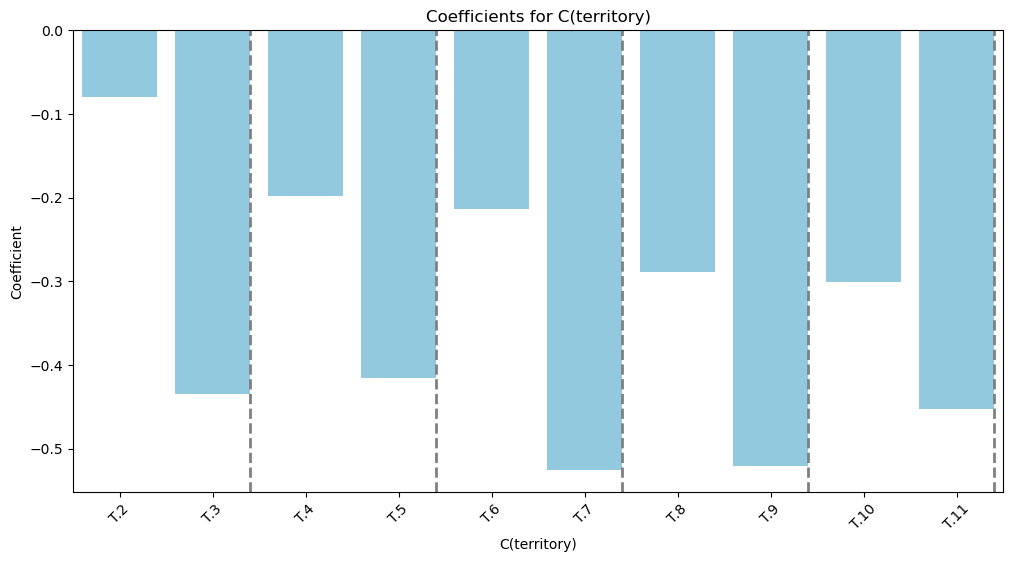

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract coefficients and territory categories from the summary table
coefficients = results.params.loc['C(territory)[T.2]': 'C(territory)[T.11]']
territories = [f'T.{i}' for i in range(2, 12)]

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=territories, y=coefficients, color='skyblue')

# Add a separating line after every odd index
for i, bar in enumerate(ax.patches):
    if i % 2 != 0:
        ax.axvline(x=bar.get_x() + bar.get_width(), color='gray', linestyle='--', linewidth=2.0)

plt.title('Coefficients for C(territory)')
plt.xlabel('C(territory)')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()

In [56]:
#les coefficients sont plus raisonnables : on a corrige la surestimation au depart en selectionnant un vecteur d'amenites dans le notebook 4_lasso